In [94]:
from datetime import datetime
#Import pandas 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [5]:
#read the csv data into a data frame
df = pd.read_csv('uber-raw-data-sep14.csv')

In [8]:
df.shape

(1028136, 4)

In [9]:
#Display the first 10 rows of the data
df.head(10)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
5,9/1/2014 0:12:00,40.6735,-73.9918,B02512
6,9/1/2014 0:15:00,40.7471,-73.6472,B02512
7,9/1/2014 0:16:00,40.6613,-74.2691,B02512
8,9/1/2014 0:32:00,40.3745,-73.9999,B02512
9,9/1/2014 0:33:00,40.7633,-73.9773,B02512


In [10]:
#Display the last 10 rows of the data
df.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


There are 1,028,136 data points in the data. 

In [30]:
#rename the date/time column to date_time to make it easier
df = df.rename(columns={'Date/Time':"date_time"})

In [12]:
df.Base.value_counts()

B02617    377695
B02598    240600
B02682    197138
B02764    178333
B02512     34370
Name: Base, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [35]:
df['date_time']=pd.to_datetime(df['date_time'])


In [81]:
#convert the date time to day, time, weekday / weekend
df['hour'] = df['date_time'].apply(lambda x: x.hour) # use the lambda function to extract the day from the date
df['day'] = df['date_time'].apply(lambda x: x.day) # use the lambda function to extract the day from the date
df['month'] = df['date_time'].apply(lambda x: x.month) # use the lambda function to extract the month from the date
df['year'] = df['date_time'].apply(lambda x: x.year) # use the lambda function to extract the year from the date
df['weekday'] = df['date_time'].apply(lambda x: "Weekday" if x.weekday()<5 else "Weekend") #Specify if the ride occured on weekday or weekend
df['weekday_num'] = df['date_time'].apply(lambda x: x.weekday())

In [104]:
#Check that the changes have taken place
df.head()

,date_time,Lat,Lon,Base,day,month,year,weekday,weekday_num,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,9,2014,Weekday,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,9,2014,Weekday,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,9,2014,Weekday,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,9,2014,Weekday,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,9,2014,Weekday,0,0


In [110]:
df.tail()

,date_time,Lat,Lon,Base,day,month,year,weekday,weekday_num,hour
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,9,2014,Weekday,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,9,2014,Weekday,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,9,2014,Weekday,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,9,2014,Weekday,1,22
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,9,2014,Weekday,1,22


Text(0, 0.5, 'Density of rides')

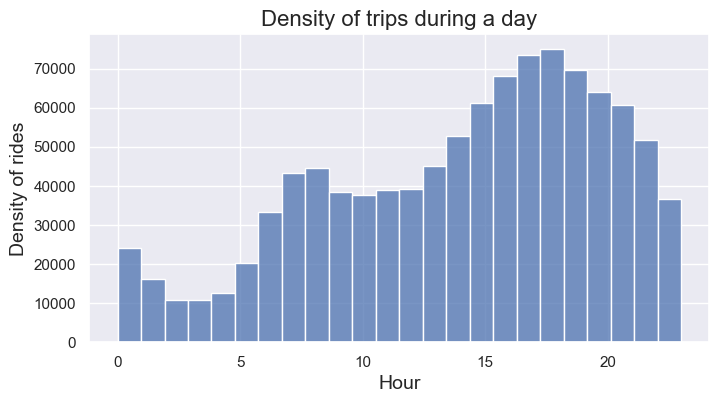

In [103]:
#How do the rides vary during the day?
plt.figure(figsize = (8,4))
sns.histplot(data=df,x='hour', bins=24 )
plt.title("Density of trips `during a day", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

Seems that most of the rides happen around 4-7 pm. It would make sense as people are usuually getting off work at that time. Running errands etc.

Text(0, 0.5, 'Density of rides')

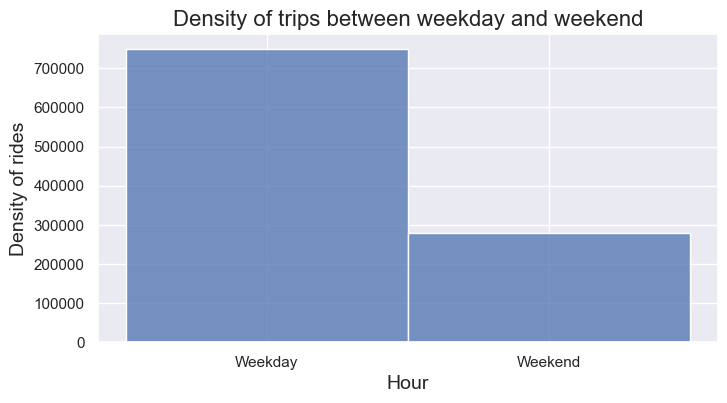

In [116]:
plt.figure(figsize = (8,4))
sns.histplot(data=df,x='weekday', bins=24 )
plt.title("Density of trips between weekday and weekend", fontsize=16)
plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

Seems most of the rides happen on weekdays. Coupled with our first findings, it would further suggest that most of the ridership would be by working class people.

Text(0, 0.5, 'Density of rides')

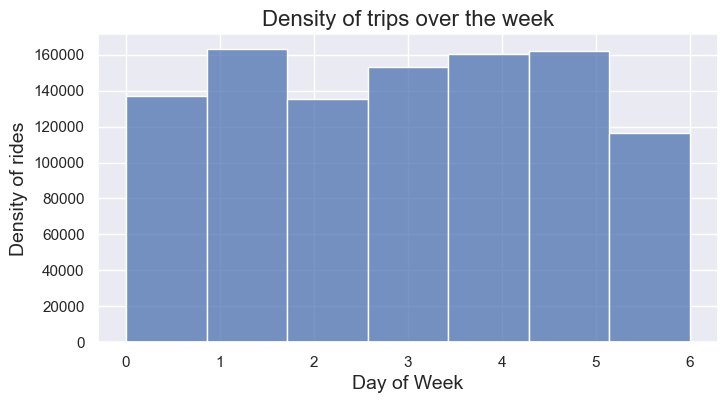

In [119]:
#Which day of the week is the most busy?
plt.figure(figsize = (8,4))
sns.histplot(data=df,x='weekday_num', bins=7 )
plt.title("Density of trips over the week", fontsize=16)
plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

Seems tuesday and towards the end of the week are the busiest days of the week

Text(0, 0.5, 'Density of rides')

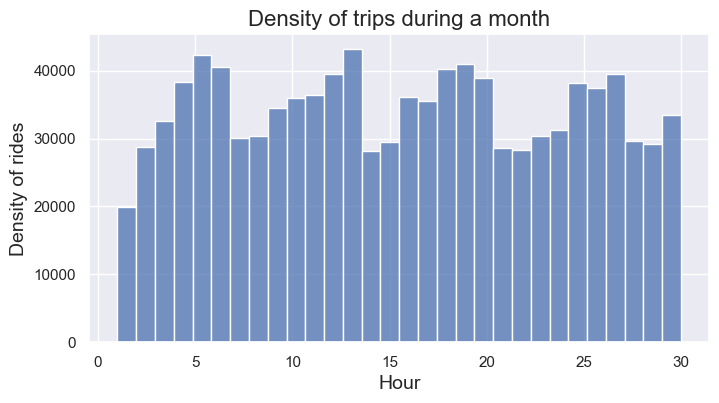

In [114]:
#How do the rides vary over the month?
plt.figure(figsize = (8,4))
sns.histplot(data=df,x='day', bins=30 )
plt.title("Density of trips over the month", fontsize=16)
plt.xlabel("Day of the month", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

The same trend can be seen over the month. Seems that this trend is consistent to have slower times at the beging of the week and then it picks up at the end of the week.

Text(0, 0.5, 'Density of rides')

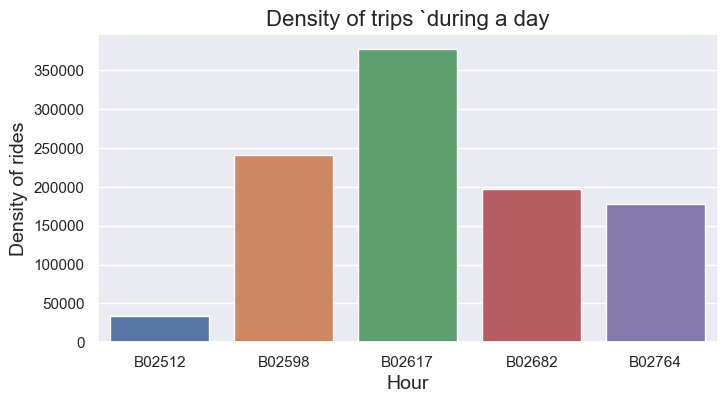

In [118]:
#Is there a preferred base?
plt.figure(figsize = (8,4))
sns.countplot(data=df,x='Base')
plt.title("Number of trips per station", fontsize=16)
plt.xlabel("Base", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

Seems B02617 is the busiest station. 

# Recommendation:
Target corperate companies because it seems most of the ridership comes from people who commute to work. Particularly going home. Perhaps their spouces forgot to pick them up or missed the bus.